In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from envs.CarRacing import CarRacing
from networks.PolicyNet import PolicyNetImage
from networks.ValueNet import ValueNetImage
from memory.RewardMemory import Memory
from tqdm.notebook import tqdm
import numpy as np
import sys
import traceback
from networks.utils import *
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
env = CarRacing()
critic = ValueNetImage(input_channels=3, hidden_dim=128)
actor = PolicyNetImage(input_channels=3, hidden_dim=128, action_dims=3)

memory = Memory(3, env.states, 3, 10000)

sigma = 1.0
_lambda = 0.97
gamma = 0.99
batch_size = 256

rewards_per_ep = {} # store rewards for each episode

for e in tqdm(range(5)):
  state = env.reset()
  cont = 0
  ep_reward = 0

  for t in range(500):
    action, logp = actor(state)
    action_dt = action.cpu().detach().numpy().reshape(3)
    #print(action_dt)
    logp_dt = logp.cpu().detach()
    # print(action_np.shape)
    #print(type(action_np))

    v = critic(state)
    v_dt = v.cpu().detach()

    obs, r, terminal, truncated, info = env.step(action_dt)
    ep_reward += r
    if action_dt[1] > 0.5:
       ep_reward += 0.1

    memory.add(state, action_dt, r, obs, terminal, v_dt, logp_dt)

    if terminal or truncated:
      break

  rewards_per_ep[e] = [ep_reward, cont]

  if terminal:
      v = 0
  else:
      v = critic(obs)
      
  v_dt = v.cpu().detach()

  i = len(memory)
  memory.adv[i] = 0
  memory.rtg[i] = v_dt

  for i in reversed(range(len(memory)-t, len(memory))):
      delta = memory.r[i] + gamma*memory.v[i+1]-memory.v[i]
      adv = gamma*_lambda*memory.adv[i+1] + delta
      rtg = gamma*memory.rtg[i+1]+memory.r[i]
      
      memory.adv[i] = adv
      memory.rtg[i] = rtg
      
#   if e % 10 == 0 and e != 0:
#       for i in tqdm(range(80), leave=False):
#           # update(self, s, a_prev, logp_a, adv, clip_ratio=0.2)
#           #s, a, r, sp, terminal, v=0, logp=0
#           actor.update(memory.s, memory.a, memory.logp, memory.adv)
#           # update(self, inputs, targets)
#           critic.update(memory.s, memory.rtg)
      
#       #tqdm.write(f"Ep {e}: Actor and Critic updated | Ep reward: {ep_reward} | Last 100 rewards: {np.mean(list(rewards_per_ep.values())[-100:], axis=0)[0]}")
#       memory.reset()



    

# Close environment
#env.plotnetwork(critic, actor)
env.close()

  0%|          | 0/5 [00:00<?, ?it/s]

[0.48249158 0.32489294 1.1965976 ]
[-0.38175228  0.24345255  0.00144154]
[ 0.14007172 -0.8366009   0.52942574]
[-0.9594107  -0.02242653 -0.90855044]
[-0.5263569  -0.30813456 -0.297675  ]
[-0.07997519 -0.04137122 -1.0037012 ]
[0.3182147  1.0347893  0.27185073]
[ 0.30074167 -0.8510564   0.07105972]
[1.4543396  0.5731681  0.23684947]
[ 0.4072727  -0.1725494  -0.10822301]
[ 0.37587336 -0.5382302  -1.024717  ]
[-0.36908466 -0.8475316   0.4517509 ]
[-1.1183189  -0.06229256  0.6621154 ]
[ 0.77723056 -0.23032849  0.10305234]
[-1.0525201e-01  7.5607157e-01  6.0877576e-04]
[ 0.03601649 -0.06289494  0.5898463 ]
[-1.1566371   0.23319648 -0.36012146]
[ 0.04177566 -0.23523417  0.02979776]
[-0.56269777 -0.22085685  0.09633758]
[-0.8611768  -0.92329717  0.5551401 ]
[0.9077894  0.01766143 1.4604149 ]
[-0.17405112  0.88680494  1.1815727 ]
[0.34869078 0.6643237  0.21905884]
[ 1.3433279  0.2097541 -0.1836405]
[-0.154563   -0.14529586  1.3242295 ]
[ 0.95971763 -0.01044829  0.42644936]
[ 0.21571104 -0.10717

In [5]:
env.close()

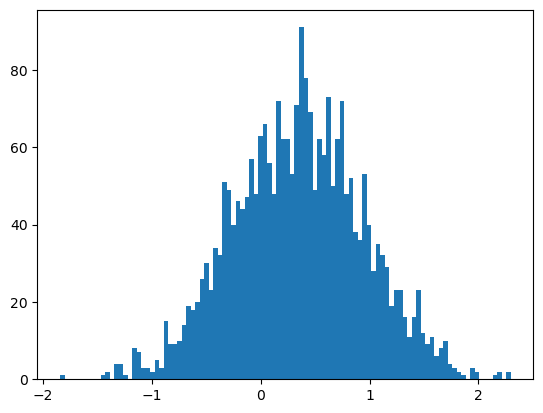

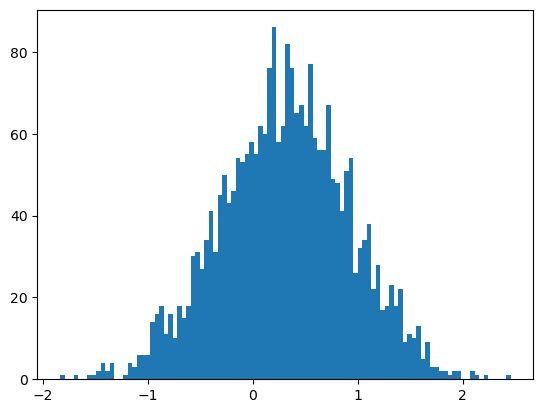

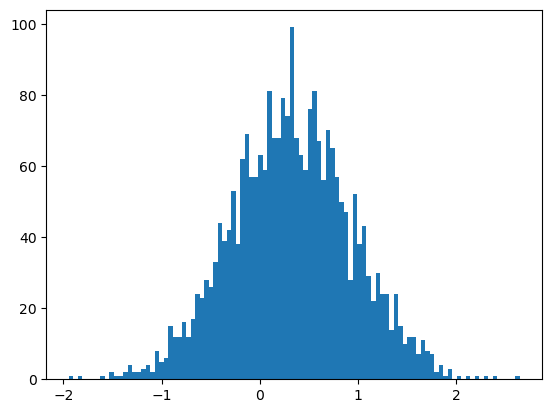

In [7]:
import matplotlib.pyplot as plt
memory.a[:, 0]
memory_len = len(memory)
# steering = memory.a[i][0]

x_axis = np.arange(0, memory_len, 1)
# plt.plot(x_axis, memory.a[:memory_len, 0], label='Steering angle')
plt.hist(memory.a[:memory_len, 0], bins=100)
plt.show()
# plt.plot(x_axis, memory.a[:memory_len, 1], label='Acceleration')
plt.hist(memory.a[:memory_len, 1], bins=100)
plt.show()
# plt.plot(x_axis, memory.a[:memory_len, 2], label='Brake')
plt.hist(memory.a[:memory_len, 2], bins=100)
plt.show()

In [ ]:
# try:
  # for e in tqdm(range(5)):
  #   state = env.reset()
    
  #   ep_reward = 0
  #   print(state.shape)
  #   for t in range(20):
      
  #     v = critic(state)

  #     obs, r, terminal, truncated, info = env.step(np.array([0,1,0]))

      #   if terminal or truncated:
      #     break
# except BaseException as ex:
#     # Get current system exception
#     ex_type, ex_value, ex_traceback = sys.exc_info()

#     # Extract unformatter stack traces as tuples
#     trace_back = traceback.extract_tb(ex_traceback)

#     # Format stacktrace
#     stack_trace = list()

#     for trace in trace_back:
#         stack_trace.append("File : %s , \nLine : %d, \nFunc.Name : %s, \nMessage : %s" % (trace[0], trace[1], trace[2], trace[3]))

#     print("Exception type : %s " % ex_type.__name__)
#     print("Exception message : %s" %ex_value)
#     # Print each line in stack trace separately
#     print("Stack trace : ")
#     for trace in stack_trace:
#         print(trace)
#     env.close()